## LDA

<img src=https://blog.kakaocdn.net/dn/tqrYR/btrEMQ6hNUl/0p9Kn4k7sKPl6lakHXAKf1/img.png width=1000><br>
LDA는 PCA와 유사하게 데이터를 저차원 공간에 투영해 차원 축소하는건 똑같다. 하지만 주된 차이점이 있다<br>
LDA와 PCA의 주요 차이: LDA는 PCA와 달리 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.<br>

**-> 즉,PCA는 피처에 상관없이 변동성이 가장 큰 축을 찾지만, LDA는 같은 클래스의 데이터는 최대한 근접하게, 다른 클래스는 최대한 떨어뜨리는 방향의 축을 찾는다.** 

<img src=https://blog.kakaocdn.net/dn/bp81HV/btrEPP5GDc9/A5sZtLVY5BccfAj23B5y41/img.png width=1000><br>
LDA는 클래스 간 분산(between-class scatter)는 최대화하고, 클래스 내부 분산(within-class scatter)은 최소화하는 방식으로 차원 축소

<img src=https://blog.kakaocdn.net/dn/bIEvRU/btrEOtvbk71/ZJHXpi35fNCLVfuoIcdV3k/img.png width=1000><br>
- PCA와 유사하지만, 가장 큰 차이는 PCA는 공분산 행렬을 사용하는데, LDA는 클래스간 분산과 클래스 내부 분산 행렬을 생성하여 사용한다는 점이다.

## 붓꽃 데이터 셋에 LDA 적용하기 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
# PCA와 마찬가지로 StandardScaler사용하여 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
# PCA와 달리 fit()호출 시 target값 입력 -> 타겟별로 훨씬 더 잘 분류
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


### LDA와 PCA 비교
: 왼쪽이 LDA, 오른쪽이 PCA
LDA가 PCA에 비해 피처를 좀 더 잘 구분한것을 볼 수 있다. (versicolor와 virginica의 경계선 부분)

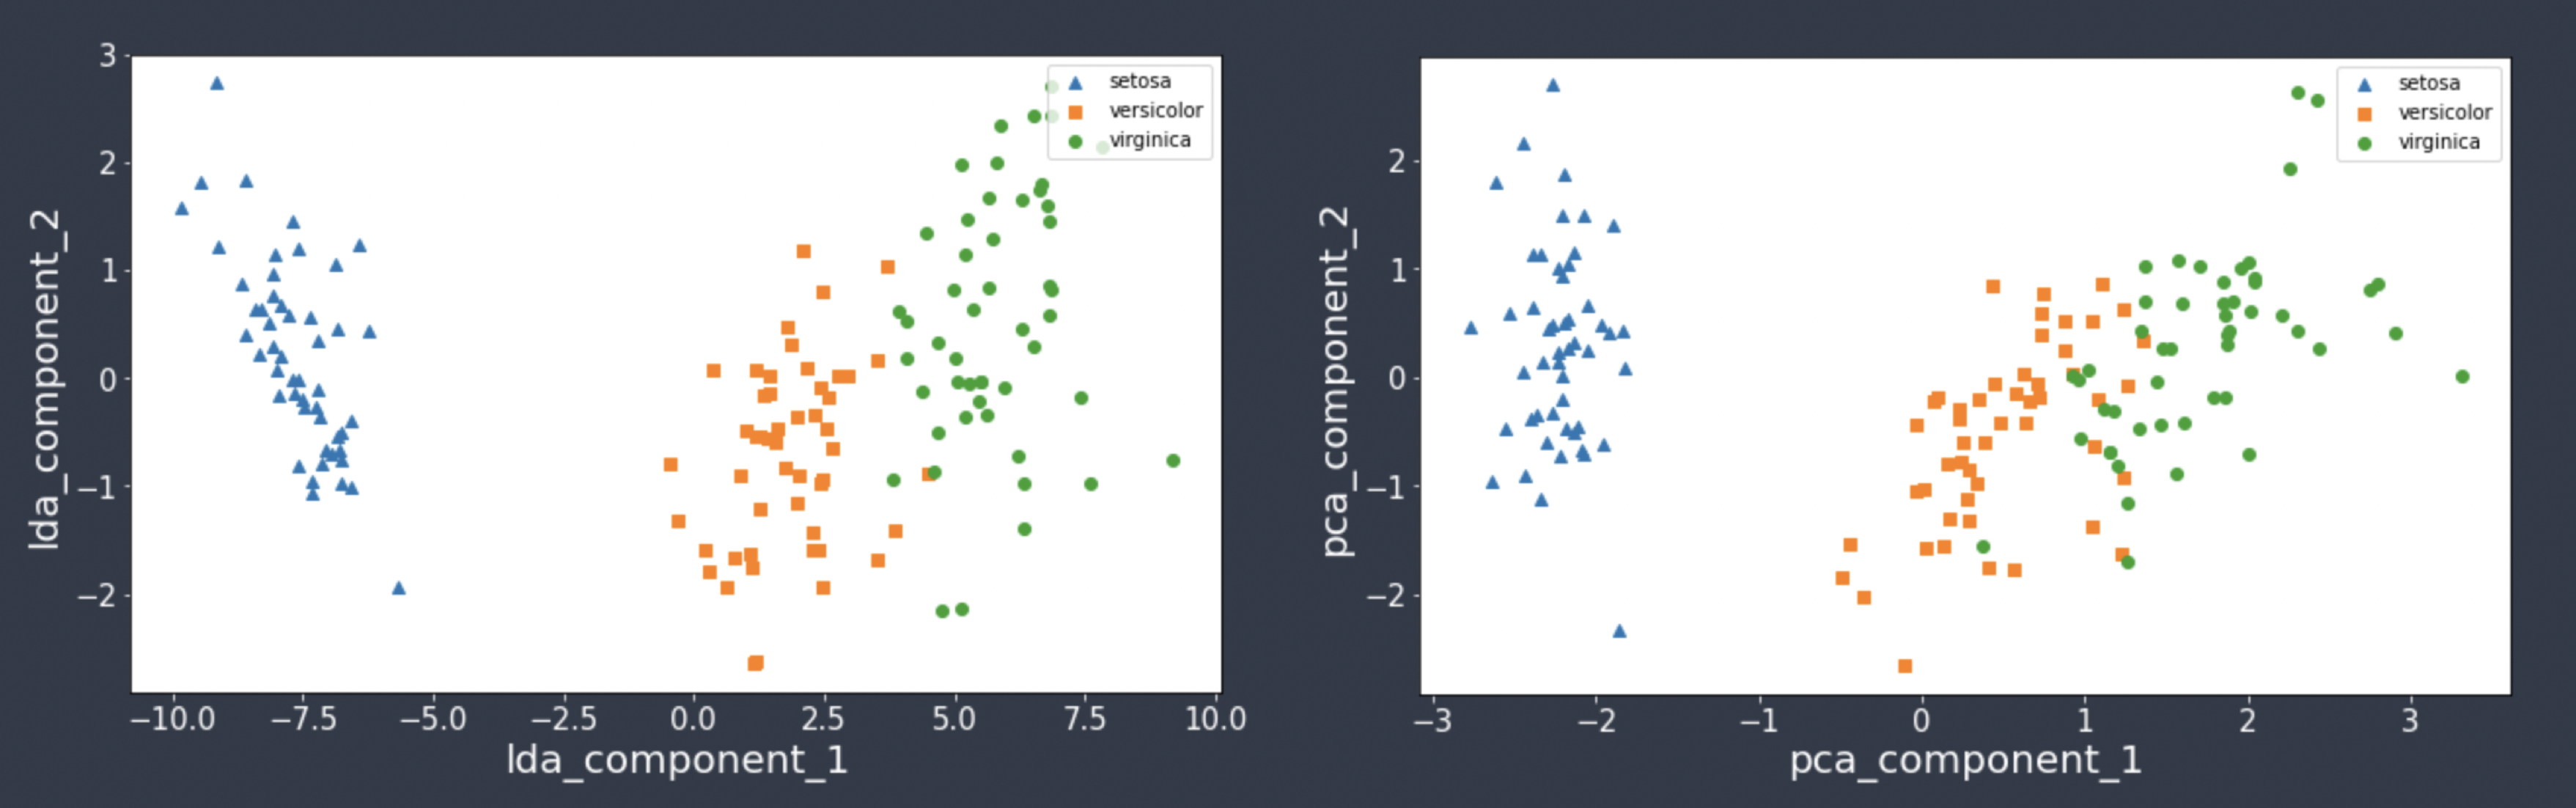

#### LDA

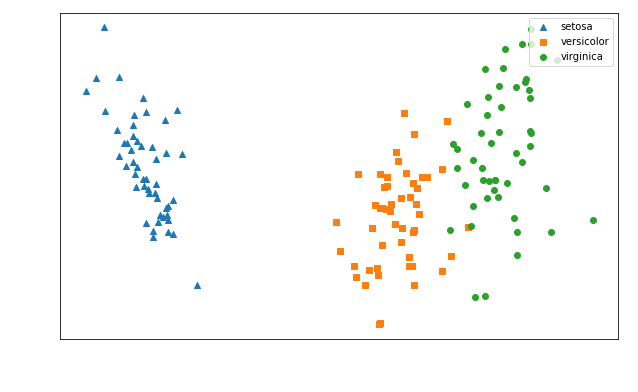

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.labelsize']= 20
plt.rcParams['figure.figsize'] = (10,6)

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    # x값에 -1 곱하니 강의와 똑같이 나옴. (sklearn 버전에 따라 좌우 대칭된다.)
    plt.scatter(x_axis_data*-1, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

#### PCA

(150, 2)


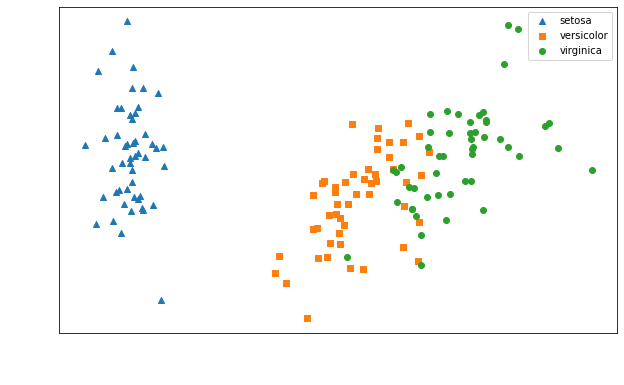

In [11]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()